# Predicting anime popularity for anime streaming service company in China
Team 4  
Jui-Chia Chung  
Harshik Rampal  

![Demon Slayer](https://img2.hulu.com/user/v3/artwork/2c3e4b00-30d9-434d-bccc-cf346e40e868?base_image_bucket_name=image_manager&base_image=8940a6b8-788b-4683-af9e-b65a3c7fa279&region=US&format=jpeg&size=952x536)

## Motivation

There is a recent boom in anime "Demon slayer: Kimetsu No Yaiba", especially in Japan, where the anime has become a hot topic even among people who don't normally watch anime. Its movie grossed over 30 billion yen at the box office and has become the top 1 movie in Japan. This anime became very popular in China as well. As we searched for "Demon slayer" and some other very popular anime such as "Attack On Titan" on several Chinese streaming platforms including bilibili, youku, iQIYI, etc., we noticed that they are only available on one or a few platforms. This is because these platforms bought the licence for broadcasting an anime so that they are the only platforms allowed to broadcast it or that they can broadcast them before any other platforms are allowed to broadcast. Therefore, the platforms with the licence are the only choices for users who want to watch the anime. Moreover, the platforms may charge users for the popular anime, and since there is no other platform with the right to broadcast the anime, users will have to pay in order to watch full episodes of the anime, which brings huge revenue to the platforms. There are many new anime coming out each season and streaming platforms have to decide which anime to invest in. An anime streaming service company may therefore be very interested in predicting what anime are more likely to be popular, i.e. predicting the rating of an anime, so that they can purchase the licence to broadcast these anime before the other competitors do.

Suppose we are an anime streaming service company in China. We plan to investigate in supervised learning to predict the rating of anime (regression task) and whether the anime will be popular or not (classification task) in order to make better decisions on what anime to invest in and how much we should invest in to increase the revenue of the company. 

We can classify an anime into popular or unpopular by performing classification task and broadcast the popular anime. We may also be interested in predicting the rating of anime. For example, on a scale of 1 to 10, we may want to buy licence to be the only platform allowed to broadcast only for the anime predicted to rate above 9, as this type of licence is more expensive. For anime predicted to rate 7 to 9, we may want to buy licence to be one of the platforms that are allowed to broadcast the anime earlier than some other platforms. Predicting the rating of anime helps to make better decisions on what type of licence we buy for an anime and to reduce the cost. We can also decide what price we should charge the users, since the users are more willing to pay a higher price only for the very popular animes. 

In a word, being able to predict the popularity of an anime can be useful in making good decisions that help increase the revenue of the company. In addition, we may use our predictions to provide a ranking (e.g. "editor's choice") and suggest our users what to pick. 
 






## Dataset

Our dataset stems from [MyAnime database](https://www.kaggle.com/hernan4444/anime-recommendation-database-2020) found on Kaggle, which contains 4 datasets. watching_status.csv describes 6 possible watching status, for example, 1 indicating currently watching, 2 indicating completed, and so on. rating_complete.csv is a subset of animelist.csv and contains ratings given by each user to animes with watching_status == 2 (completed). We plan to mainly use anime.csv from the database. 

animelist.csv is tidy, with 109 million rows and 5 columns. The column variables include  user_id, anime_id, rating, watching_status, and watched_episodes. This dataset contains 17,562 different animes and 325,772 users. 

anime.csv is tidy, with 17562 rows and 35 columns. It encompasses descriptive features for each anime, including genre, number of episodes, duration, source, score, type, etc.

We will split the dataset randomly into training data and test data at a ratio of 0.8 to 0.2. 

In [ ]:
# Necessary imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Model imports
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

# Evaluation metric imports
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score
from sklearn.model_selection import cross_val_score

# Imbalance data
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Reading data
anime_features = pd.read_csv('../data/anime.csv')

In [ ]:
anime_features.head(5)

,MAL_ID,Name,Score,Genders,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,Bandai Visual,"Funimation, Bandai Entertainment",Sunrise,Original,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678,329800,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,"Sunrise, Bandai Visual",Sony Pictures Entertainment,Bones,Original,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770,57964,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,Victor Entertainment,"Funimation, Geneon Entertainment USA",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925,146918,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,"TV Tokyo, Bandai Visual, Dentsu, Victor Entert...","Funimation, Bandai Entertainment",Sunrise,Original,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378,33719,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,"TV Tokyo, Dentsu",Unknown,Toei Animation,Manga,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108,3394,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


Check for NaN/null values across all columns

In [ ]:
anime_features.isnull().sum()

MAL_ID           0
Name             0
Score            0
Genders          0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

animelist.csv is the most prolific dataset and we anticipate that it should be enough to compute accurate and reliable ratings.

In [ ]:
anime_features.rename({'Genders':'Genres'}, axis = 1, inplace = True)
anime_features.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [ ]:
def imputeMeanValues(feature):
    """
    Takes in the data column and replaces 'Unknown' values with mean of the column values.
    
    """
    
    feature.replace({'Unknown':0}, inplace = True)
    feature = feature.astype('float64')
    mean = feature.mean()
    feature.replace({0:mean}, inplace = True)
    return feature
      

## EDA

We first performed EDA to gain some insights in some interesting questions. 


#### What genres are more common in top 100 anime? 
Our company may focus on including more animes from the popular genres. We may even produce our own anime that fall under these popular genres. (Some streaming platforms produce their own anime in order to reduce the cost of purchasing anime.)


In [ ]:
# Sort anime by score and select the top 100 
dataset = anime_features.copy()
dataset.Score = imputeMeanValues(dataset.Score)
top_100 = dataset.sort_values(['Score'], ascending=False).head(100)
top_100.head(10)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
3971,5114,Fullmetal Alchemist: Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",Fullmetal Alchemist:Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,TV,64,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity),1.0,3,2248456,183914,171871,1644938,75728,32456,323463,714811.0,401507.0,199160.0,70045.0,20210.0,9308.0,3222.0,1536.0,2162.0,16806.0
15926,40028,Shingeki no Kyojin: The Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",Attack on Titan Final Season,進撃の巨人 The Final Season,TV,16,"Dec 7, 2020 to ?",Winter 2021,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,MAPPA,Manga,23 min. per ep.,R - 17+ (violence & profanity),2.0,119,733260,44862,566239,553,6658,2090,157720,173154.0,63756.0,26016.0,8793.0,2674.0,1336.0,588.0,382.0,514.0,11061.0
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",Steins;Gate,STEINS;GATE,TV,24,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older,3.0,9,1771162,148452,114349,1134756,60926,35600,425531,468504.0,275960.0,140914.0,57740.0,21375.0,11126.0,5061.0,2292.0,1678.0,5255.0
14963,38524,Shingeki no Kyojin Season 3 Part 2,9.10,"Action, Drama, Fantasy, Military, Mystery, Sho...",Attack on Titan Season 3 Part 2,進撃の巨人 Season3 Part.2,TV,10,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity),4.0,63,1073626,40985,54607,906824,5533,3099,103563,327290.0,239451.0,110481.0,33662.0,8365.0,2974.0,1108.0,550.0,385.0,4169.0
9913,28977,Gintama°,9.10,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama Season 4,銀魂°,TV,51,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older,5.0,329,404121,11868,48011,167130,16612,11472,160896,78918.0,37902.0,21360.0,10215.0,3898.0,2311.0,952.0,648.0,1100.0,4508.0
6474,11061,Hunter x Hunter (2011),9.10,"Action, Adventure, Fantasy, Shounen, Super Power",Hunter x Hunter,HUNTER×HUNTER（ハンター×ハンター）,TV,148,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,"VAP, Nippon Television Network, Shueisha",VIZ Media,Madhouse,Manga,23 min. per ep.,PG-13 - Teens 13 or older,6.0,12,1673924,147274,227277,1094486,79587,31652,240922,454000.0,304741.0,167331.0,65085.0,18241.0,7789.0,2780.0,1243.0,1054.0,4602.0
6006,9969,Gintama',9.08,"Action, Sci-Fi, Comedy, Historical, Parody, Sa...",Gintama Season 2,銀魂',TV,51,"Apr 4, 2011 to Mar 26, 2012",Spring 2011,"TV Tokyo, Aniplex, Dentsu, Trinity Sound, Mira...",Unknown,Sunrise,Manga,24 min. per ep.,PG-13 - Teens 13 or older,7.0,362,365579,6567,26492,190008,10615,7084,131380,74992.0,44740.0,24294.0,9584.0,3222.0,1655.0,694.0,338.0,437.0,2910.0
741,820,Ginga Eiyuu Densetsu,9.07,"Military, Sci-Fi, Space, Drama",Legend of the Galactic Heroes,銀河英雄伝説,OVA,110,"Jan 8, 1988 to Mar 17, 1997",Unknown,"Kitty Films, K-Factory",Sentai Filmworks,"Artland, Magic Bus",Novel,26 min. per ep.,R - 17+ (violence & profanity),7.0,633,230168,13834,25968,52583,14911,5950,130756,30432.0,11497.0,7096.0,3577.0,1570.0,965.0,480.0,264.0,509.0,2265.0
7261,15417,Gintama': Enchousen,9.04,"Action, Comedy, Historical, Parody, Samurai, S...",Gintama:Enchousen,銀魂' 延長戦,TV,13,"Oct 4, 2012 to Mar 28, 2013",Fall 2012,"TV Tokyo, Aniplex, Dentsu, Shueisha, Miracle Bus",Unknown,Sunrise,Manga,24 min. per ep.,PG-13 - Teens 13 or older,9.0,660,222819,2586,7800,143353,2753,2012,66901,51383.0,32100.0,17753.0,6900.0,19

In [ ]:
# For anime with more than 1 genres, split them into separate rows
top_genres = pd.concat([pd.Series(row['Score'], row['Genres'].replace(" ", '').split(','))              
                   for _, row in top_100.iterrows()]).reset_index()
top_genres.rename({'index': 'Genres', 0:'Score'}, axis = 1, inplace = True)
top_genres.Genres.value_counts()

Drama            52
Comedy           42
Shounen          41
Action           41
Supernatural     31
Sci-Fi           27
Historical       24
Fantasy          24
SliceofLife      24
Mystery          21
Adventure        19
School           17
Parody           14
Romance          14
Samurai          13
Seinen           13
Sports           11
SuperPower        9
Demons            8
Psychological     8
Military          8
Thriller          7
Shoujo            6
Mecha             6
Magic             5
Vampire           4
Space             4
Josei             3
Police            3
Game              2
Horror            2
Music             1
MartialArts       1
Dementia          1
Name: Genres, dtype: int64

The result suggests that Drama, Comedy, Action, Shounen, and Supernatural are the top 5 most common genres that the top 100 anime fall under. 

#### What studios are likely to produce more popular anime? 
Our company may be interested in collaborating with these studios in the long term.




In [ ]:
# Some anime are produced by multiple studios, split these into separate rows
studio_feat = pd.concat([pd.Series(row['Score'], row['Studios'].replace(" ", '').split(','))              
                   for _, row in dataset.iterrows()]).reset_index()
studio_feat.rename({'index': 'Studio', 0: 'Score'}, axis = 1, inplace = True)

In [ ]:
# Score > 8 will be considered popular
studio_feat['Popular'] = studio_feat['Score'].apply(lambda x: 1 if x > 8 else 0)

In [ ]:
# Take average of scores of all anime produced by each studio
# Take sum of popular, which is the number of popular anime produced
studio_feat = studio_feat.groupby(by=['Studio']).agg({'Score':['mean'], 'Popular':['sum']})

In [ ]:
# Select out top 20 studios producing the most popular anime
top_20_studio_pop = studio_feat.sort_values(by=[('Popular',  'sum')], ascending=False).head(20)
top_20_studio_pop

,Score,Popular
,mean,sum
Studio,,
Madhouse,6.919282,46
ProductionI.G,6.867340,39
Sunrise,6.735704,28
J.C.Staff,6.617368,26
TMSEntertainment,6.462560,25
Bones,7.246288,24
A-1Pictures,7.056815,20
KyotoAnimation,7.167270,19


In [ ]:
# Of the top 20 studio defined above, rank them again with average score
top_20_studio_score = top_20_studio_pop.sort_values(by=[('Score', 'mean')], ascending=False)
top_20_studio_score

,Score,Popular
,mean,sum
Studio,,
Shuka,7.523194,8
WhiteFox,7.303095,10
Bones,7.246288,24
KyotoAnimation,7.167270,19
ufotable,7.121583,14
Shaft,7.075900,18
A-1Pictures,7.056815,20
WitStudio,7.016686,9


In [ ]:
# Create ranking of these 20 studios both by number of popular anime produced and the average scoring of all anime
pop_rank = list(zip(top_20_studio_pop.index, np.arange(1, 21)))
score_rank = list(zip(top_20_studio_score.index, np.arange(1, 21)))

studio_pop_rank = pd.DataFrame([rank for _, rank in pop_rank], index=[stud for stud, _ in pop_rank], columns=['Popular rank'])
studio_score_rank = pd.DataFrame([rank for _, rank in score_rank], index=[stud for stud, _ in score_rank], columns=['Score rank'])
studio_rank = studio_pop_rank.merge(studio_score_rank, left_index=True, right_index=True)

# Compute overall ranking by adding the 2 rankings
studio_rank['Overall'] = studio_rank['Popular rank'] + studio_rank['Score rank']
studio_rank.sort_values(['Overall'])

,Popular rank,Score rank,Overall
Bones,6,3,9
Madhouse,1,11,12
KyotoAnimation,8,4,12
ProductionI.G,2,12,14
A-1Pictures,7,7,14
Shaft,9,6,15
ufotable,11,5,16
WhiteFox,16,2,18
Sunrise,3,16,19
Brain'sBase,12,9,21


## Machine Learning Problem

The main effort will be focussed on predicting reliable anime ratings that can aid the company in selecting profitable anime. Most regression tasks are evaluated using the Root Mean Square Error (RMSE) metric. Another candidate is Mean Absolute Error (MAE), but it is less preferred as RMSE penalizes small errors better than MAE and moreover, RMSE is easily differentiable for parameter updates, especially in the context of backpropagation in Deep Neural Networks. Conventional supervised Machine Learning improves with adding more data/experience i.e more user ratings, which will help our modelling algorithm to perform well. Hence, we expect our model will also exhibit the same behaviour of improving its performance, i.e. lower RMSE, with more data. However, the data or the experience is expected to go through extensive pre-processing and cleaning as regression algorithms are highly sensitive to the quality of their input. For example, we may use one hot encoding for categorical features such as source to avoid introducing spurious relationships. In addition to regression, we also plan to recommend appropriate anime to users by leveraging classical algorithms on collaborative and/or content based filtering, if time allows. Our dual objective is justified as the practice of rating prediction and anime recommendation is critical for the success and profit of a company in the entertainment web streaming space. 



In [ ]:
def formatDate(dateString):
    """
    Takes in the start and end date in the string format and returns a list having both dates in mm-dd-yy format
    
    """
    month2digit = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10,
                  'Nov':11, 'Dec':12}
    
    startFormat, endFormat = '12-12-25', '12-12-25'
    
    if len(dateString) > 1:
        duration = dateString.split('to')
        if len(duration) > 1:
            startDate, endDate = duration
            
            if len(startDate.split()) > 2:
                month, day, year = startDate.split()
                startFormat = str(month2digit[month]) + str('-') + str(day[0]) + str('-') + str(year)
            if len(startDate.split()) == 2:
                month, year = startDate.split()
                startFormat = str(month2digit[month[0:-1]]) + str('-') + '1' + str('-') + str(year)
            if len(endDate.split()) > 2:
                month, day, year = endDate.split()
                endFormat = str(month2digit[month]) + str('-') + str(day[0]) + str('-') + str(year)
            if len(endDate.split()) == 2:
                month, year = endDate.split()
                endFormat = str(month2digit[month[0:-1]]) + str('-') + '1' + str('-') + str(year)

    return startFormat, endFormat

def findDays(date):
    """
    Takes in a list containing the start and the end date. Returns the number of days in between them. 
    
    """
    
    days = 0
    start, end = date
    invalid_date = '12-12-25'
    if start != invalid_date and end != invalid_date:
        start = pd.to_datetime(start)
        end   = pd.to_datetime(end)
        if end > start:
            days  = (end - start).days
    return days

In [ ]:
def imputeModeValues(feature):
    """
    Takes in the data column and replaces 'Unknown' values with mode of the column values.
    
    """
    
    feature.replace({'Unknown':0}, inplace = True)
    feature = feature.astype('float64')
    mode = feature.mode()[0]
    feature.replace({0:int(mode)}, inplace = True)
    return feature

In [ ]:
def encodeCategoricalFeature(feature, data):
    """
    Input is the categorical feature and the dataframe. Computes and returns the encoded feature
    using CounterVectorizer().
    
    """
    vectorizer = CountVectorizer()
    transformedFeature = vectorizer.fit_transform(feature)
    encodedFeature = pd.DataFrame(transformedFeature.toarray(), columns = vectorizer.get_feature_names())
    return encodedFeature
    

In [ ]:
def addEncodedCategoricalFeature(data, encodedFeature, featureName):
    """
    Input is dataframe, encoded feature returned by encodeCategoricalFeature function and the feature name.
    Concatenates the encoded feature with the dataframe and returns the modified dataframe.
    
    """
    data = pd.concat([data, encodedFeature], axis = 1)
    data.drop([featureName], axis = 1, inplace = True)
    return data
    

In [ ]:
def plotDataCorrelation(data, label):
    """
    Plots the correlation matrix between the data and the label. 
    """
    
    data = pd.concat([data, label], axis = 1)
    sns.set(font_scale=0.8)
    sns.set_palette("coolwarm")
    sns.heatmap(data.corr(), annot = True, fmt='.1g', cmap="coolwarm")
    

In [ ]:
def splitData(data, labels, split_ratio):
    """
    Splits the input data, labels into corresponding training and test sets, as defined by the split_ratio
    
    """
    
    X, y = data, labels
    trainingData, testData, trainingLabels, testLabels = train_test_split(X, y, test_size=split_ratio, random_state = 42)
    return trainingData, testData, trainingLabels, testLabels

In [ ]:
def normalizingData(data):
    """
    Normalizes the input data using MinMaxScaler(). 
    
    """
    
    scaler = preprocessing.MinMaxScaler()
    normalizedData = scaler.fit_transform(data)
    return normalizedData
    

In [ ]:
def findRMSE(predictions, labels):
    """
    Computes and returns the Root Mean Square Error (RMSE) between the predictions and true labels. 
    
    """
    mse = mean_squared_error(y_test, predictions_test_set)
    rmse = np.sqrt(mse)
    return rmse
    

The following are the stages in the data cleaning pipeline. 
1. Identify and remove redundant, zero-variance features.
2. Impute unknown/void values across the feature set by the corresponding mean/mode of the feature.
3. Convert the date format from string to mm/dd/yy format in the 'Aired' feature. 
4. Identify and segment numerical and categorical features. 
5. Encoding the following non-comma seperated Categorical Variables using the CountVectorizer function.<br>
&emsp;a. Genres<br>
&emsp;b. Type<br>
&emsp;c. Source<br>
&emsp;d. Rating<br>
6. Dropping the following comma-seperated categorical features as their encoding greatly increases the total number    of features. Adding encoded combinations of these features to the dataset is experimented later. <br>
&emsp;a. Producers<br>
&emsp;b. Studios<br> 
&emsp;c. Name<br>
 

In [ ]:
def imputeFeatures(data):
    """
    This function takes in the dataset and returns the modified dataset containing imputed values.
    """
    
    data.Episodes = imputeModeValues(data.Episodes)
    numericDuration = data.Duration.apply(lambda x:x.split()[0])
    data.Duration = imputeMeanValues(numericDuration)
    
    return data

In [ ]:
def cleanDate(data):
    """
    This function takes in the dataset and returns the modified dataset containing the edited date values.
    """
    
    data.Aired.replace({'Unknown':'0'}, inplace = True)
    formatedDate = data.Aired.apply(lambda x:formatDate(x))
    data.Aired = formatedDate.apply(lambda x: findDays(x))
    data.Aired.replace({0:int(data.Aired.mean())}, inplace = True)
    
    return data 

In [ ]:
def cleanCategoricalFeatures(data, featureList):
    """
    This function takes in the datset and encodes all features listed in the featureList. 
    """
    for name in featureList:
        encoding = encodeCategoricalFeature(data[name], data)
        data = addEncodedCategoricalFeature(data, encoding, name)
    return data



In [ ]:
def dropFeatures(data, dropList):
    """
    This function takes in the datset and drops all features listed in the drop list. 
    """
    for name in dropList:
        data.drop([name], axis = 1, inplace = True)
    return data



In [ ]:
def featurePreprocessing(data):
    """
    Performs data cleaning on the given data and returns the resulting features,labels, list of numerical features,
    list of categorical features.
    
    """
    
    redundant = ['MAL_ID','English name', 'Japanese name', 'Premiered', 'Licensors', 'Score-10', 'Score-9', 'Score-8',
                'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1']
    features = data.copy()
    features = dropFeatures(features, redundant)
    
    
    imputedFeatures = imputeFeatures(features)
   
    features = cleanDate(imputedFeatures)
   
    
    numerical_features   = ['Episodes', 'Aired', 'Duration','Popularity','Members','Favorites', 
                            'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']
    categorical_features = ['Name','Genres', 'Types', 'Producers', 'Studios', 'Source', 'Rating']
    
    encodeList = ['Genres', 'Type', 'Source', 'Rating']
    
    encodedFeatures = cleanCategoricalFeatures(features, encodeList)
    
    dropList = ['Producers', 'Studios', 'Name']
    features = dropFeatures(encodedFeatures, dropList)
    
    labels = features.Score
    labels = imputeMeanValues(labels)

    newDropList = ['Score', 'Ranked']
    features = dropFeatures(features, newDropList)
   


    return features, labels, numerical_features, categorical_features
    

In [ ]:
X, y, numerical_features, categorical_features = featurePreprocessing(anime_features)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
X.head(5)

,Episodes,Aired,Duration,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,fantasy,fi,game,harem,hentai,historical,horror,josei,kids,life,magic,martial,mecha,military,music,mystery,of,parody,police,...,yuri,movie,music,ona,ova,special,tv,unknown,book,card,digital,game,koma,light,manga,music,novel,original,other,picture,radio,unknown,visual,web,13,17,ages,all,children,hentai,mild,nudity,older,or,pg,profanity,rx,teens,unknown,violence
0,26.0,364,24.0,39,1251960,61971,105808,718161,71513,26678,329800,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,1.0,99,1.0,518,273145,1174,4143,208333,1935,770,57964,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,26.0,155,24.0,201,558913,12944,29113,343492,25465,13925,146918,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0
3,26.0,153,25.0,1467,94683,587,4300,46165,5121,5378,33719,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0
4,52.0,364,23.0,4369,13224,18,642,7314,766,1108,3394,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


Splitting the dataset into 80% for training, 20% for testing. 

In [ ]:

X_train, X_test, y_train, y_test = splitData(X, y, 0.20)


Normalizing features using MinMaxScaler() from sklearn. This ensures, that they are no numerical over/under flows 
while predicting regression values. Normalizing data also helps in avoiding underfitting on the training data set. 

In [ ]:

X_train[numerical_features] = normalizingData(X_train[numerical_features])
X_test[numerical_features]  = normalizingData(X_test[numerical_features])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

Correlation matrix is a convinient way of identifying features that are more correlated with the target label ('Score'). Retaining highly positive and negative correlated features are helpful in improving the performace of the regression model. 

However, since there are less number of features in our processed dataset, we do not remove very low positively correlated features such as 'Episodes' and 'Aired'. Interestingly, there is a negative correlation between the 'Popularity' feature and the target label, 'Score'. This is because 'Popularity' is the ranking number of users that added the anime to their list. The more popular the anime is, the lower the value of 'Popularity' is. Therefore, we wee a negative correlation between 'Popularity' and 'Score'.

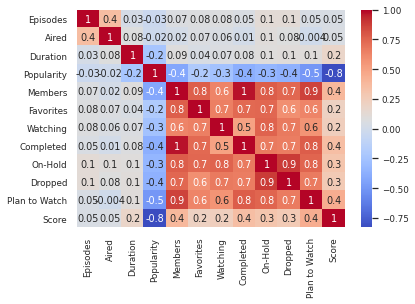

In [ ]:
plotDataCorrelation(X_train[numerical_features], y)

## Support Vector Regression Model for regression task: Predicting score of anime

A typical regression task can be done by one of the following models.

1. Deep Neural Networks
2. Multivariate Regression
3. Support Vector Machines/Support Vector Regression
4. Logistic Regression.

Logistic regression is generally treated as a baseline model as it is unable to generalize well on highly non linear test data. The same notion holds true for multivariate regression as both try to model linear decision boundaries from the training data. The former uses sigmoid activation to handle binary classification/regression while the latter uses softmax activation to predict the probability distribution over different classes. On the other hand, Deep Neural Networks are eminent in achieving state of the art performance under different verticals such as Computer Vision and Natural Language Processing, but, are plagued by their demand of huge amounts of training data and further rigorous hyperparameter tuning for increasing their generalization performance(test accuracy). Hence, for our case, we needed a model which could work well for non-linear data and was relatively easy to train and tune.

Thus, we experimented Support Vector Regression (SVR) following the above mentioned reasoning. Additionally, SVR models are also robust to outliers. However, they suffer from increased training time on large datasets. In this case, the pros of using this model greatly outweighed its cons and hence, we finalized the SVR model for our task of regression.


In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
predictions_test_set = svr.predict(X_test)
findRMSE(predictions_test_set, y_test)

0.5294305676106621

We tried encoding and including the comma seperate values (Names, Producers and Studios) in the training dataset. One hot encoding these features lead to a huge increase in the total number of features. We also experimented of encoding two out of these 3 features to observe any variations in the RMSE. However, these encoded features had a minor impact on improving the efficacy of our model.

In [ ]:
def experimentFeatures(data):
    
    """
    Performs data cleaning on the given data and returns the additional encoded commaseperated features, 
    labels, list of numerical features and list of categorical features.
    """
    
    redundant = ['MAL_ID','English name', 'Japanese name', 'Premiered', 'Licensors', 'Score-10', 'Score-9', 'Score-8',
                'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1']
    features = data.copy()
    features = dropFeatures(features, redundant)
    
    imputedFeatures = imputeFeatures(features)
   
    features = cleanDate(imputedFeatures)
   
    
    numerical_features   = ['Episodes', 'Aired', 'Duration','Popularity','Members','Favorites', 
                            'Watching', 'Completed', 'On-Hold', 'Dropped', 'Plan to Watch']
    categorical_features = ['Name','Genres', 'Types', 'Producers', 'Studios', 'Source', 'Rating']
    
    #Encoding categorical and comma seperated features.
    encodeList = ['Genres', 'Type', 'Source', 'Rating', 'Producers', 'Studios']
    
    encodedFeatures = cleanCategoricalFeatures(features, encodeList)
    
    
    labels = features.Score
    labels = imputeMeanValues(labels)
    
    dropList = ['Score', 'Ranked', 'Name']
    features = dropFeatures(encodedFeatures, dropList)

    return features, labels, numerical_features, categorical_features
    

In [ ]:
X, y, numerical_features, categorical_features = experimentFeatures(anime_features)


X_train, X_test, y_train, y_test = splitData(X, y, 0.20)


X_train[numerical_features] = normalizingData(X_train[numerical_features])
X_test[numerical_features]  = normalizingData(X_test[numerical_features])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
# After Encoding Producers and Studios
X_train.shape

(14049, 2390)

Results in an increased training time with negligible improvement in the efficacy of the model.

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
# Error after encoding both Producers and Studios.
predictions_test_set = svr.predict(X_test)
findRMSE(predictions_test_set, y_test)

0.5152252681868617

Excluding features derived from shows that are already being streamed.

In [ ]:
def experimentPreStreamingFeatures(data):
    
    """
    Performs data cleaning on the given data and returns the resulting pre streaming features, 
    labels, list of numerical features and list of categorical features.
    
    """
    
    redundant = ['MAL_ID','English name', 'Japanese name', 'Premiered', 'Licensors', 'Score-10', 'Score-9', 'Score-8',
                'Score-7', 'Score-6', 'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1']
    features = data.copy()
    features = dropFeatures(features, redundant)
    
    imputedFeatures = imputeFeatures(features)
    features = cleanDate(imputedFeatures)
    
    # Excluding all broadcast related features
    non_broadcast_features=['Episodes','Duration','Genres','Type','Producers','Source','Rating','Studios','Score','Name']
    numerical_features = ['Episodes', 'Duration']
    categorical_features = ['Genres', 'Types', 'Producers', 'Source', 'Studios', 'Rating', 'Name']
    features = features[non_broadcast_features]
    
    
    #Encoding categorical and comma seperated features.
    encodeList = ['Genres', 'Type', 'Source', 'Rating', 'Producers', 'Studios']
    
    encodedFeatures = cleanCategoricalFeatures(features, encodeList)
    
    
    labels = features.Score
    labels = imputeMeanValues(labels)
    
    dropList = ['Score', 'Name']
    features = dropFeatures(encodedFeatures, dropList)

    return features, labels, numerical_features, categorical_features

In [ ]:
X, y, numerical_features, categorical_features= experimentPreStreamingFeatures(anime_features)


X_train, X_test, y_train, y_test = splitData(X, y, 0.20)


X_train[numerical_features] = normalizingData(X_train[numerical_features])
X_test[numerical_features]  = normalizingData(X_test[numerical_features])



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [ ]:
X_train.shape

(14049, 2381)

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)
predictions_test_set = svr.predict(X_test)
findRMSE(predictions_test_set, y_test)

0.6699053954593158

Conclusion on the regression model.

We experimented two types of models, one worked on the entire feature set (all of categorical and numerical features), while the other model worked on a feature set containing only the pre-streaming set of features. In both cases, the model has successfully predicted reliable ratings as the RMSE in both cases is less than 1. 

## Random Forest Classifier for classification task: binary classification of anime into popular/ unpopular

What we really care about is whether the anime is popular or not. Since purchasing licences is a huge cost, it is important to predict the top anime that are more likely to be popular. It is also important to pick what other anime to broadcast, besides the most popular ones. Here, we set threshold as 8 (on the scale of 1 to 10). Anime scoring above 8 will be defined as popular. 

We chose Random Forest Classifier as our algorithm because it is a bagged decision tree model that averages away the variance by splitting on a random subset of features. It also better handles imbalanced data. Since we are setting a high threshold, imbalanced data is a big issue for our classification task.

In [ ]:
# Impute Score
rf_dataset = anime_features.copy()
rf_dataset.Score = imputeMeanValues(rf_dataset.Score)

# Split dataset into popular and unpopular subsets
threshold = 8
popular_anime = rf_dataset[rf_dataset['Score'] > threshold]
unpopular_anime = rf_dataset[rf_dataset['Score'] <= threshold]

# Number of popular anime on average per premiered season
popular_anime.groupby(['Premiered']).count().mean()[0]

5.610526315789474

In [ ]:
# Number of unpopular anime on average per premiered season
unpopular_anime.groupby(['Premiered']).count().mean()[0]

73.71861471861472

Our analysis showed that when the threshold is 8, on average, around 5 to 6 anime will be defined as popular each premiered season and around 73 to 74 anime will be defined as unpopular. Purchasing around 5 to 6 anime per premiered season is common practice for many companies [[1]](#References), while bigger and richer companies may purchase more than 10 anime per season. Thus, setting a high threshold as 8 (on the scale of 1 to 10) is reasonable. However, we can view threshold as a hyperparameter. For example, if we want to purchase more anime, we can lower the threshold. In the following analysis, we will keep the threshold as 8.

In [ ]:
X, y, numerical_features, categorical_features= experimentPreStreamingFeatures(anime_features)


X_train, X_test, y_train, y_test = splitData(X, y, 0.20)


X_train[numerical_features] = normalizingData(X_train[numerical_features])
X_test[numerical_features]  = normalizingData(X_test[numerical_features])



/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [ ]:
def rf_classify(X_train, y_train, X_test, y_test, threshold=8):
  ''' Trains Random Forest Classifier and prints out evaluation of predictions. 
  Args:
    X_train: training data features
    y_train: training data labels (average score of anime)
    X_test: test data features
    y_test: test data labels (average score of anime)
    threshold: anime scoring above the theshold will be classified as popular
  Returns:
    Random Forest model
  '''
  rf = RandomForestClassifier()
  y_train = y_train.apply(lambda x: 1 if x > threshold else 0)
  y_test = y_test.apply(lambda x: 1 if x > threshold else 0) 
  rf.fit(X_train, y_train)
  predictions_test_set = rf.predict(X_test)
  print('RMSE:', findRMSE(predictions_test_set, y_test))
  print('Mean accuracy:', rf.score(X_test, y_test))
  print('AUC score:', roc_auc_score(y_test, predictions_test_set))

  return rf


In [ ]:
# Perform classification
rf = rf_classify(X_train, y_train, X_test, y_test, threshold=8)

RMSE: 0.6699053954593158
Mean accuracy: 0.9783660688869912
AUC score: 0.635818114625358


In [ ]:
# 5-fold cross validation score
cross_val_score(rf, X, y.apply(lambda x: 1 if x > threshold else 0))

array([0.9695417 , 0.97124964, 0.97238041, 0.97465831, 0.97209567])

Though the RMSE of 0.67 is low and both mean accuracy and cross validation score are very high, the AUC score of 63.6% is very low, suggesting that our model is poor. This may be caused by imbalanced data, as less than 10% of anime are defined as popular with threshold as 8. Therefore, we then handle the imbalanced data with SMOTE.

## Handling imbalanced data

In [ ]:
def rf_classify_smote(X_train, y_train, X_test, y_test, threshold=8):
  ''' Performs oversampling with SMOTE, trains Random Forest Classifier and print out evaluation of predictions. 
  Args:
    X_train: training data features
    y_train: training data labels (average score of anime)
    X_test: test data features
    y_test: test data labels (average score of anime)
    threshold: anime scoring above the theshold will be classified as popular
  Returns:
    Random Forest model
  '''
  # Oversampling using SMOTE
  y_train = y_train.apply(lambda x: 1 if x > threshold else 0)
  y_test = y_test.apply(lambda x: 1 if x > threshold else 0)
  X_balance, y_balance = SMOTE().fit_resample(X_train, y_train)

  rf = RandomForestClassifier()
  rf.fit(X_balance, y_balance)
  predictions_test_set = rf.predict(X_test)
  print('RMSE:', findRMSE(predictions_test_set, y_test))
  print('Mean accuracy:', rf.score(X_test, y_test))
  print('AUC score:', roc_auc_score(y_test, predictions_test_set))

  return rf


In [ ]:
# Fit and predict using new data generated by SMOTE
rf_balance = rf_classify_smote(X_train, y_train, X_test, y_test, threshold=8)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RMSE: 0.6699053954593158
Mean accuracy: 0.977512097922004
AUC score: 0.6558467555665056


The result suggests that using SMOTE along may not be sufficient to improve the model, as we see only an increase of 0.02. Perhaps the data is still very biased even after oversampling. Therefore, we also tried lowering the threshold.

In [ ]:
rf_balance = rf_classify_smote(X_train, y_train, X_test, y_test, threshold=7)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


RMSE: 0.6699053954593158
Mean accuracy: 0.8710503842869343
AUC score: 0.7902413556605301


In [ ]:
# 5-fold cross validation score
threshold = 7
cross_val_score(rf_balance, X, y.apply(lambda x: 1 if x > threshold else 0))

array([0.80216339, 0.83262169, 0.86958998, 0.87784738, 0.85791572])

By lowering the threshold, we get a much better model with a higher AUC score. The mean accuracy and cross validation score dropped but are still fairly high. Also, the RMSE remained the same. However, the limitation is that we are lowering our standard of classifying an anime as popular. One possible method that we can try in the future is to drop the data with unknown score, instead of imputing the score. This might decrease the percentage of unpopular anime and achieve a more balanced data. However, for our analysis, we didn't choose to drop the unknown values as we want to keep as much data as possible. 

## Text feature encoding 

We tried sklearn packages such as TfidfVectorizer, CountVectorizer, and OneHotEncoding to encode some text features including Name. However, this results in a huge number of features. We then tried to limit the maximum number of features, but this results in many 'useless' features, such as stop words. Therefore, dealing with text features will be our future direction. Here, we are showing just an example of what we tried, encoding Name with TfidfVectorizer.

In [ ]:
# Featurizing Name of anime
tfidf_vec = TfidfVectorizer(max_features=50) # Get more than 15000 features if we don't set max_features (max term frequency)
name_tfidf = tfidf_vec.fit_transform(anime_features.Name)
name_tfidf

<17562x50 sparse matrix of type '<class 'numpy.float64'>'
	with 15472 stored elements in Compressed Sparse Row format>

In [ ]:
# A lot of stop words
tfidf_vec.get_feature_names()

['2nd',
 'ai',
 'animation',
 'anime',
 'boku',
 'chan',
 'dai',
 'de',
 'densetsu',
 'ga',
 'gakuen',
 'gekijou',
 'girls',
 'go',
 'gundam',
 'hen',
 'ii',
 'iii',
 'kara',
 'koi',
 'kun',
 'love',
 'mahou',
 'monogatari',
 'movie',
 'na',
 'neko',
 'ni',
 'no',
 'of',
 'ova',
 'pokemon',
 'sama',
 'san',
 'season',
 'sekai',
 'shin',
 'shoujo',
 'shounen',
 'special',
 'specials',
 'tachi',
 'the',
 'to',
 'tv',
 'uchuu',
 'wa',
 'wo',
 'yo',
 'zhi']

## Limitations

The run time for fitting SVR model and predicting with SVR model are quite long. It may be better to filter out popular anime with Random Forest first, and then predict the rating only for the popular anime. 

The limitation of Random Forest model is that the data can be very imbalanced when we set a high threshold. There is a trade of between creating a balanced data and being stricter or conserved in classifying anime as popular.

Some of the features used in our machine learning tasks are not available before broadcasting, such as watching status. Instead of including these features, we may consider including more features that will be available before broadcasting. For example, if the source of the anime is manga, i.e. the anime is produced based on a manga, we can collect data on the popularity of the manga. Intuitively, if a manga is popular, it is likely that the anime based on it will also be popular.

Some text features like Name are excluded from our machine learning tasks because their encoding creates a huge number of features that are difficult for machine learning models to handle. Therefore, we may need larger models like deep neural networks to include these features. 

Our database is collected from the website myanimelist.net. This website is in English and the demographics of the users are not known. Since our assumption is that our company is competing with streaming platforms in China, this dataset may not reflect the preference of anime viewers in China and we should collect more data from the Chinese population. 

## Future directions

Our analysis provides prediction for what anime are worth purchasing licence for, but a competent company needs more than just a few popular anime. The company needs to make sure that they also have a collection of other anime to provide more options for users and perhaps attract new users. One possible way to decide what anime to add to the collection is to tune the threshold of the Random Forest model. By lowering the threshold, we can filter out more anime that are likely to be more popular than others and include them in the collection. 

We can also collect more data to improve our model. For example, we can study the demographics of the current users, such as age, gender, etc., and include these features in training to get more tailored and accurate predictions for our company. Furthermore, we can allow users of our streaming platform to vote for anime that they would like to watch for the next season. 

There are other factors that may affect the revenue of our company. One important aspect is to improve the user experience in order to attract and keep more users to use our streaming platform. For example, we can build a recommendation system. By suggesting animes to each user according to their preference, we can attract users to continue using our platform. Some other factors including providing good subtitles, short or no advertisement, high quality video, and so on will also help attracting users and thus, increasing revenue. Another aspect is to determine the price. For example, we may provide membership, where users can pay a membership fee to watch all anime our platform provides. If a user did not join membership, he/she may have to pay a higher price for watching the most popular anime. 

We may also provide some unique features to stand out from our competitors. One possible idea is to implement a system where users can view anime with their friends synchronously online. They can join a chatroom to watch anime together and chat at the same time, as if they are actually watching the anime together in the same space. This might be a cool feature especially during the pandemic and this may also encourage more users to invite their friends to use our streaming platform. We may even provide discount if users invite their friends to join our membership. 

Another way of increasing revenue or decreasing cost is through collaboration. Besides collaborating with studios, as we mentioned in EDA, we may collaborate with online shops that sell anime goods, manga, etc.. For example, we can include links to those online shops on our website and provide promotion codes to our members. This way, the online shops may benefit from the advertisement on our website, and we may benefit from taking a cut from the online shops. We can also collaborate with other streaming platforms to decrease the cost. Since there is a limit on the number of anime we can purchase or add to our collection, we may include links to other streaming platforms for anime that we don't have on our platform. Even though we may not gain any revenue, we can avoid losing users because they can still find resource/link from our website. This also means that our company may purchase less anime, therefore, reducing the cost.

## References

1. https://zhuanlan.zhihu.com/p/58832776 